In [23]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import os
import math
from pathlib import Path

os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

def GetSize(path):
    file = h5py.File(path, mode='r')
    n = file["times"].shape[0]
    file.close()
    return n

def Load(path, chunk=[]):
    # @brief Reads grid data and time data from a specified hdf5 file.
    # @param path The path of the HDF5 file
    # @param dataset A string name of the main dataset containing the states data
    # @param times A string name of the time dataset containing all time points
    # @param chunk An optional [start, end] list that specifies how many time steps to load
    file = h5py.File(path, "r")
    if chunk:
        data_array = np.array(file['data'][chunk[0]:chunk[1],:,:])
        time_array = np.array(file['times'][chunk[0]:chunk[1]])
    else:
        data_array = np.array(file['data'])
        time_array = np.array(file['times'])
    file.close()
    return (data_array, time_array)

home = '/srv/public/Maikel'
fvs = '{}/FiniteVolumeSolver/'.format(home)
build = '{}/build_2D-Release/'.format(fvs)

hlle_path = '{}/SodShockTube/HLLE.h5'.format(build)
hlle_data, _ = Load(hlle_path)

hllem_path = '{}/SodShockTube/HLLEM.h5'.format(build)
hllem_data, _ = Load(hllem_path)

cons_path = '{}/SodShockTube/Conservative.h5'.format(build)
cons_data, _ = Load(cons_path)

consm_path = '{}/SodShockTube/ConservativeM.h5'.format(build)
consm_data, _ = Load(consm_path)

char_path = '{}/SodShockTube/Characteristics.h5'.format(build)
char_data, _ = Load(char_path)

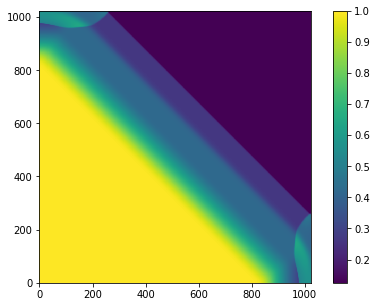

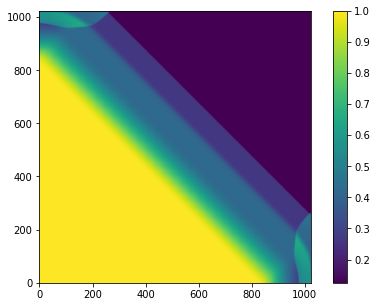

In [24]:
var = 0

hlle_i = min(60, hlle_data.shape[0] - 1)
hlle_q = hlle_data[hlle_i, var, :, :] 
f = plt.figure(figsize=(8, 5))
im = plt.imshow(hlle_q, origin='lower', interpolation='None')
plt.colorbar()
plt.show()

hllem_i = min(60, hllem_data.shape[0] - 1)
hllem_q = hllem_data[hllem_i, var, :, :] 
f = plt.figure(figsize=(8, 5))
im = plt.imshow(hllem_q, origin='lower', interpolation='None')
plt.colorbar()
plt.show()

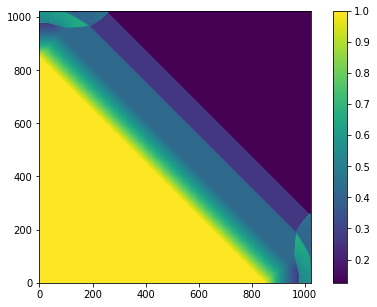

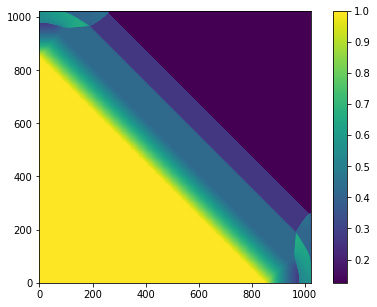

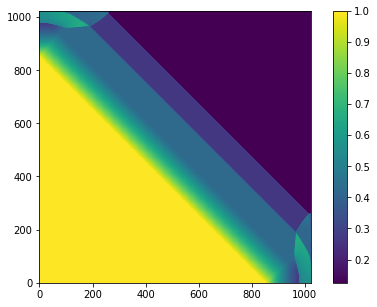

In [25]:
var = 0

cons_i = min(60, cons_data.shape[0] - 1)
cons_q = cons_data[cons_i, var, :, :] 
f = plt.figure(figsize=(8, 5))
im = plt.imshow(cons_q, origin='lower', interpolation='None')
plt.colorbar()
plt.show()

consm_i = min(60, consm_data.shape[0] - 1)
consm_q = consm_data[consm_i, var, :, :] 
f = plt.figure(figsize=(8, 5))
im = plt.imshow(consm_q, origin='lower', interpolation='None')
plt.colorbar()
plt.show()

char_i = min(60, char_data.shape[0] - 1)
char_q = char_data[char_i, var, :, :] 
f = plt.figure(figsize=(8, 5))
im = plt.imshow(char_q, origin='lower', interpolation='None')
plt.colorbar()
plt.show()